In [4]:
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
file_path = "data.npy"

with open(file_path, "rb") as file:
    data_array = np.load(file)

In [6]:
# Assuming you already have the 'data_array' with shape (24, num_columns)
num_copies = 100

# Create an array of shape (num_copies, 1) to repeat 'data_array' vertically
repeated_array = np.tile(data_array, (num_copies, 1))

# Stack the repeated arrays vertically
data_array_extended = np.vstack(repeated_array)

print(data_array_extended.shape)


(2400, 45)


In [7]:
len(data_array_extended)

2400

In [8]:
def shift_data(data_array, window_size=5):
  X = []
  y = []
  for i in range(len(data_array_extended)-window_size):
    row = [r for r in data_array_extended[i:i+window_size]]
    X.append(row)
    label = [data_array_extended[i+window_size]]
    y.append(label)
  return np.array(X), np.array(y)



In [9]:
X,y = shift_data(data_array=data_array_extended)
X.shape, y.shape

((2395, 5, 45), (2395, 1, 45))

In [10]:
scalers_x = {}
for i in range(X.shape[2]):
    scalers_x[i] = MinMaxScaler().fit(X[:, :, i])

scalers_y = {}
for i in range(y.shape[2]):
    scalers_y[i] = MinMaxScaler()
    scalers_y[i] =  MinMaxScaler().fit(y[:, :, i]) 
 
for i in range(X.shape[2]):
    X[:, :, i] = scalers_x[i].transform(X[:, :, i])

for i in range(y.shape[2]):
    y[:, :, i] = scalers_y[i].transform(y[:, :, i]) 

In [11]:
X.shape

(2395, 5, 45)

In [12]:
X3_train, y3_train = X[:1800], y[:1800]
X3_val, y3_val = X[1800:2100], y[1800:2100]
X3_test, y3_test = X[2100:], y[2100:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((1800, 5, 45),
 (1800, 1, 45),
 (300, 5, 45),
 (300, 1, 45),
 (295, 5, 45),
 (295, 1, 45))

In [13]:
# for i in range(X.shape[2]):
#     X[:, :, i] = scalers_x[i].inverse_transform(X[:, :, i])

# for i in range(y.shape[2]):
#     y[:, :, i] = scalers_y[i].inverse_transform(y[:, :, i]) 
 

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [15]:
model5 = Sequential()
model5.add(InputLayer((5, 45)))
model5.add(LSTM(64))
model5.add(Dense(18, 'relu'))
model5.add(Dense(45, 'linear'))

model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                28160     
                                                                 
 dense (Dense)               (None, 18)                1170      
                                                                 
 dense_1 (Dense)             (None, 45)                855       
                                                                 
Total params: 30,185
Trainable params: 30,185
Non-trainable params: 0
_________________________________________________________________


In [16]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [17]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
56/57 [============================>.] - ETA: 0s - loss: 0.2157 - root_mean_squared_error: 0.4644

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


57/57 [==============================] - 22s 233ms/step - loss: 0.2157 - root_mean_squared_error: 0.4644 - val_loss: 0.1997 - val_root_mean_squared_error: 0.4471
Epoch 2/10
51/57 [=========================>....] - ETA: 0s - loss: 0.1916 - root_mean_squared_error: 0.4378

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


57/57 [==============================] - 10s 173ms/step - loss: 0.1910 - root_mean_squared_error: 0.4371 - val_loss: 0.1820 - val_root_mean_squared_error: 0.4267
Epoch 3/10
57/57 [==============================] - ETA: 0s - loss: 0.1747 - root_mean_squared_error: 0.4181

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


57/57 [==============================] - 9s 153ms/step - loss: 0.1747 - root_mean_squared_error: 0.4181 - val_loss: 0.1669 - val_root_mean_squared_error: 0.4086
Epoch 4/10
50/57 [=========================>....] - ETA: 0s - loss: 0.1609 - root_mean_squared_error: 0.4012

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


57/57 [==============================] - 6s 113ms/step - loss: 0.1602 - root_mean_squared_error: 0.4003 - val_loss: 0.1531 - val_root_mean_squared_error: 0.3912
Epoch 5/10
52/57 [==========================>...] - ETA: 0s - loss: 0.1474 - root_mean_squared_error: 0.3840

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


57/57 [==============================] - 6s 106ms/step - loss: 0.1468 - root_mean_squared_error: 0.3832 - val_loss: 0.1403 - val_root_mean_squared_error: 0.3744
Epoch 6/10
53/57 [==========================>...] - ETA: 0s - loss: 0.1349 - root_mean_squared_error: 0.3673

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


57/57 [==============================] - 6s 112ms/step - loss: 0.1345 - root_mean_squared_error: 0.3668 - val_loss: 0.1286 - val_root_mean_squared_error: 0.3586
Epoch 7/10
51/57 [=========================>....] - ETA: 0s - loss: 0.1238 - root_mean_squared_error: 0.3518

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


57/57 [==============================] - 6s 103ms/step - loss: 0.1234 - root_mean_squared_error: 0.3513 - val_loss: 0.1182 - val_root_mean_squared_error: 0.3437
Epoch 8/10
50/57 [=========================>....] - ETA: 0s - loss: 0.1139 - root_mean_squared_error: 0.3376

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


57/57 [==============================] - 7s 117ms/step - loss: 0.1135 - root_mean_squared_error: 0.3369 - val_loss: 0.1089 - val_root_mean_squared_error: 0.3299
Epoch 9/10
50/57 [=========================>....] - ETA: 0s - loss: 0.1053 - root_mean_squared_error: 0.3245

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


57/57 [==============================] - 10s 176ms/step - loss: 0.1047 - root_mean_squared_error: 0.3237 - val_loss: 0.1007 - val_root_mean_squared_error: 0.3172
Epoch 10/10
55/57 [===========================>..] - ETA: 0s - loss: 0.0970 - root_mean_squared_error: 0.3114

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


57/57 [==============================] - 11s 189ms/step - loss: 0.0970 - root_mean_squared_error: 0.3115 - val_loss: 0.0935 - val_root_mean_squared_error: 0.3056


In [18]:
def plot_predictions2(model, X, y, start=0, end=100):
    predictions = model.predict(X)
    p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
    p_actuals, temp_actuals = y[:, 0 ,0], y[:, 0 ,1]
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                            'Temperature Actuals':temp_actuals,
                            'Pressure Predictions': p_preds,
                            'Pressure Actuals': p_actuals
                            })
    plt.plot(df['Temperature Predictions'][start:end])
    plt.plot(df['Temperature Actuals'][start:end])
    plt.plot(df['Pressure Predictions'][start:end])
    plt.plot(df['Pressure Actuals'][start:end])
    return df[start:end]

In [19]:
y3_test.shape

(295, 1, 45)

10/10 [==============================] - 1s 3ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.382942,0.143779,0.294220,0.203434
1,0.373328,0.015269,0.279453,0.000000
2,0.381536,0.000000,0.291119,0.018277
3,0.367479,0.031893,0.285993,0.044930
4,0.366263,0.108934,0.290771,0.071282
...,...,...,...,...
95,0.379920,0.146255,0.269114,0.205999
96,0.382942,0.143779,0.294220,0.203434
97,0.373328,0.015269,0.279453,0.000000
98,0.381536,0.000000,0.291119,0.018277


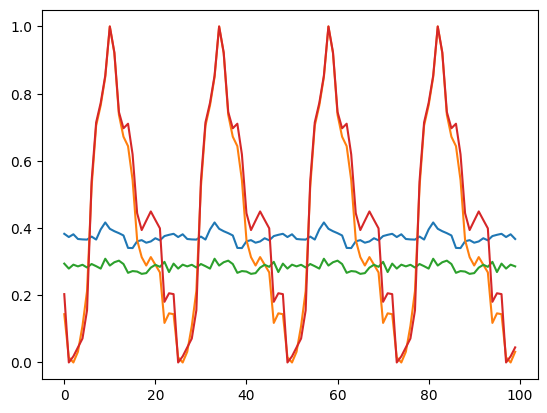

In [20]:
plot_predictions2(model5, X3_test, y3_test)